In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

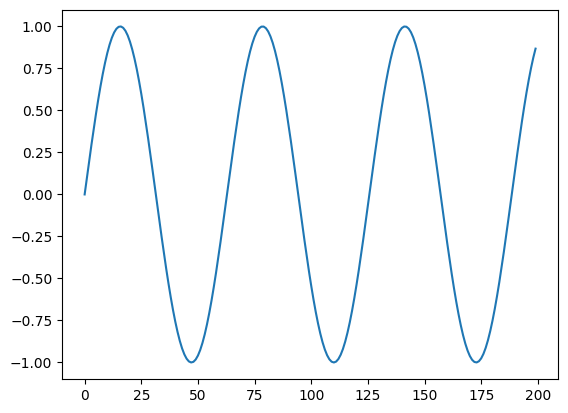

In [4]:
# make the original data -> sine wave
series = np.sin(0.1 * np.arange(200))  # + np.random.randn(200) * 0.1 # noise

# plot it
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [6]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.1),
)

# train the ANN
# Remember to split the data carefully - train and test data are continuous
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 107ms/step - loss: 1.1426 - val_loss: 0.7363
Epoch 2/80
3/3 [==============================] - 0s 19ms/step - loss: 0.6770 - val_loss: 0.3301
Epoch 3/80
3/3 [==============================] - 0s 28ms/step - loss: 0.2524 - val_loss: 0.2151
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.2009 - val_loss: 0.0603
Epoch 5/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0392 - val_loss: 0.0771
Epoch 6/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0639 - val_loss: 0.0459
Epoch 7/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0384 - val_loss: 0.0761
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0755 - val_loss: 0.1123
Epoch 9/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0616 - val_loss: 0.0599
Epoch 10/80
3/3 [==============================] - 0s 33ms/step - loss: 0.0526 - val_loss: 0.0382
Epoch 11/80
3/3 [===========

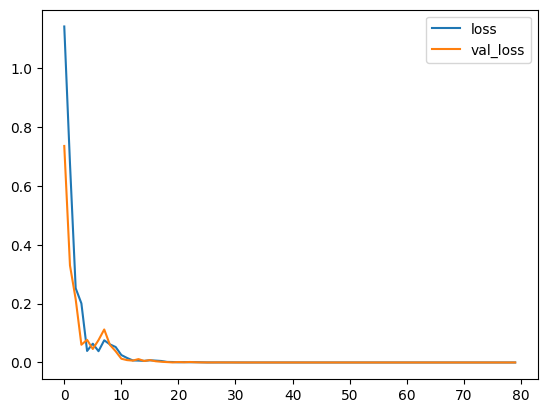

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

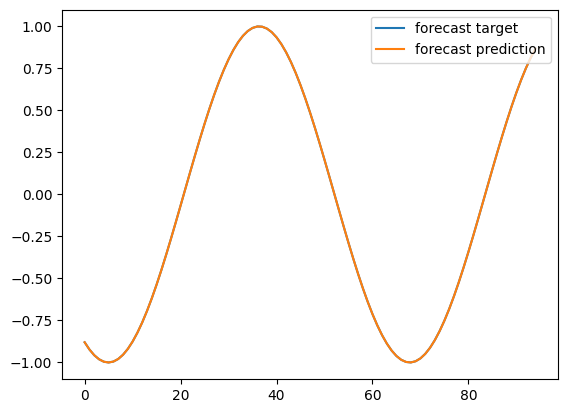

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

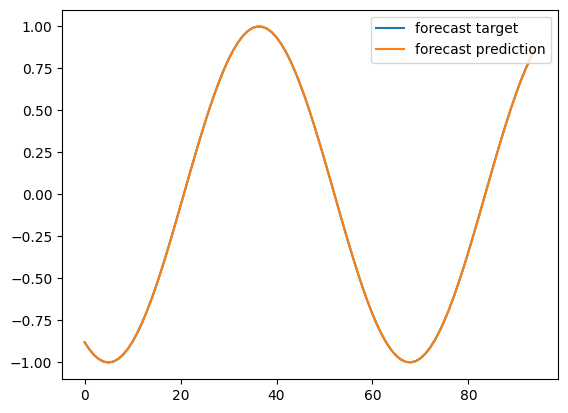

In [11]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

### The model did learn the series is periodic and tried to smooth out it when there was noise.